###### Include steps
- Load data
- Explorative data analysis
- Pre-processing and normalization 
- Save data

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis
from functools import reduce
import warnings
warnings.filterwarnings("ignore")

In [0]:
customers = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_customers_dataset.csv')
order_items = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_orders_dataset.csv')
product = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_products_dataset.csv')
sellers = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/olist_sellers_dataset.csv')
product_name = pd.read_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/product_category_name_translation.csv')

In [0]:
# displaying data shape
dataset = {
    'customers': customers,
    'order_items': order_items,
    'order_payments': order_payments,
    'orders': orders,
    'order_reviews':order_reviews,
    'product': product,
    'product_name': product_name,
    'sellers': sellers
}

for x, y in dataset.items():
    print(f'{x}')
    print(y.info())
    print('Missing data:', y.isnull().any().any())
    if y.isnull().any().any():
      print("No. missing value: ")
      print(f'{y.isnull().sum()}\n')
    print("--------------------------------------------------------------")

customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 customer_id 99441 non-null object
 1 customer_unique_id 99441 non-null object
 2 customer_zip_code_prefix 99441 non-null int64 
 3 customer_city 99441 non-null object
 4 customer_state 99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
Missing data: False
--------------------------------------------------------------
order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 112650 non-null object 
 1 order_item_id 112650 non-null int64 
 2 product_id 112650 non-null object 
 3 seller_id 112650 non-null object 
 4 shipping_limit_date 112650 non-null object 
 5 price 112650 non-null float64
 6 freight_value 112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
Missing data: False
--------------------------------------------------------------
order_payments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 103886 non-null object 
 1 payment_sequential 103886 non-null int64 
 2 payment_type 103886 non-null object 
 3 payment_installments 103886 non-null int64 
 4 payment_value 103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
Missing data: False
--------------------------------------------------------------
orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 order_id 99441 non-null object
 1 customer_id 99441 non-null object
 2 order_status 99441 non-null object
 3 order_purchase_timestamp 99441 non-null object
 4 order_approved_at 99281 non-null object
 5 order_delivered_carrier_date 97658 non-null object
 6 order_delivered_customer_date 96476 non-null object
 7 order_estimated_delivery_date 99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB
None
Missing data: True
No. missing value: 
order_id 0
customer_id 0
order_status 0
order_purchase_timestamp 0
order_approved_at 160
order_delivered_carrier_date 1783
order_delivered_customer_date 2965
order_estimated_delivery_date 0
dtype: int64

--------------------------------------------------------------
order_reviews
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 review_id 100000 non-null object
 1 order_id 100000 non-null object
 2 review_score 100000 non-null int64 
 3 review_comment_title 11715 non-null object
 4 review_comment_message 41753 non-null object
 5 review_creation_date 100000 non-null object
 6 review_answer_timestamp 100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
Missing data: True
No. missing value: 
review_id 0
order_id 0
review_score 0
review_comment_title 88285
review_comment_message 58247
review_creation_date 0
review_answer_timestamp 0
dtype: int64

--------------------------------------------------------------
product
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 product_id 32951 non-null object 
 1 product_category_name 32341 non-null object 
 2 product_name_lenght 32341 non-null float64
 3 product_description_lenght 32341 non-null float64
 4 product_photos_qty 32341 non-null float64
 5 product_weight_g 32949 non-null float64
 6 product_length_cm 32949 non-null float64
 7 product_height_cm 32949 non-null float64
 8 product_width_cm 32949 non-null float64
dtypes: float64(7), object(

####### 1 customer can be in multiple states ==> drop state feature

In [0]:
# Check variable consistency
customers = customers[['customer_id',
                       'customer_unique_id',
                       'customer_state']]

customer = customers.groupby('customer_unique_id')['customer_state'].count().reset_index()
print("No customers living in one state: ", customer.loc[customer.customer_state==1,:]['customer_unique_id'].nunique())
print("No customers in total: ", customers['customer_unique_id'].nunique())

No customers living in one state: 93099
No customers in total: 96096

In [0]:
# Select required parameters
customers = customers[['customer_id',
                       'customer_unique_id']]


orders = orders[['order_id',
                 'customer_id']]

order_items = order_items[['order_id',
                           'product_id',
                           'price']]

order_payments = order_payments[['order_id',
                                 'payment_value']]\
                              .groupby('order_id')['payment_value']\
                              .sum()\
                              .reset_index()

order_reviews = order_reviews[['order_id',
                               'review_score']]

products = product[['product_id',
                    'product_category_name']]

# merge into one dataset
dfList = [orders,order_items, order_payments, order_reviews]

df1 = reduce(lambda left, 
                      right: pd.merge(left, 
                                     right, 
                                             on=['order_id'],
                                             how='inner'),
                dfList )

df1.drop_duplicates(keep='first',inplace=True)

df2 = df1.merge(customers,
                how="inner",
                left_on="customer_id",
                right_on="customer_id")

df3 = df2.merge(product,
                how="inner",
                left_on="product_id",
                right_on="product_id")

df4 = df3.merge(product_name,
                how="inner",
                left_on="product_category_name",
                right_on="product_category_name")

olist = df4[['order_id', 'customer_id', 'product_id', 'payment_value','price',
             'review_score', 'customer_unique_id', 
             'product_category_name_english']]

olist.drop_duplicates(keep='first',
                      inplace=True)

0.5723228680393628
0.5755699927710785

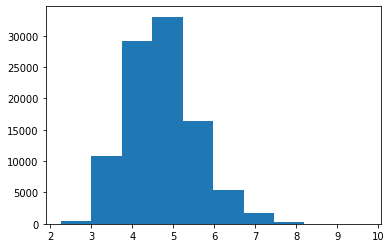

In [0]:
# Normal distribution of log payment value
olist_ordervalue = olist.groupby('order_id')['payment_value'].sum().reset_index()
plt.hist(np.log(olist_ordervalue.payment_value.values))
print(kurtosis(np.log(olist_ordervalue.payment_value.values)))
print(skew(np.log(olist_ordervalue.payment_value.values)))

##### Split data into 2 datasets: 1) customers with more than 1 order; customers ordered first time

In [0]:
num_order = olist.groupby('customer_unique_id')['order_id']\
                .count()\
                .reset_index()

repeatList = num_order.loc[num_order.order_id>=2,:]['customer_unique_id'].unique()
firsttimeList = num_order.loc[num_order.order_id==1,:]['customer_unique_id'].unique()

repeat_olist = olist[olist['customer_unique_id'].isin(repeatList)]

firsttime_olist =  olist[olist['customer_unique_id'].isin(firsttimeList)]

print(repeat_olist.customer_unique_id.nunique())
print(repeat_olist.product_id.nunique())
repeat_olist.head(3)

5699
7843
Out[10]:

,order_id,customer_id,product_id,payment_value,price,review_score,customer_unique_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,87285b34884572647811a353c7ac498a,38.71,29.99,4,7c396fd4830fd04220f754e42b4e5bff,housewares
8,badcf619a4531116e06f0f2f6f711215,f77c7eef15674a5fd3d3c13553ca803e,a5a0e71a81ae65aa335e71c06261e260,131.23,38.00,5,1a073bf0423277d82e201d983a86ceb1,housewares
9,dc8155452b97affece4c5a698beb11f6,fc8da044983142c6a87d308b2cbfb76f,a5a0e71a81ae65aa335e71c06261e260,53.63,41.90,4,46da36c3df7118852b770394d1ba2be5,housewares


Feature Engineering

In [0]:
product_price = repeat_olist[['product_id',
                             'price']]

product_price = product_price.groupby('product_id')['price']\
                            .mean()\
                            .reset_index()

col         = 'price'
conditions  = [ product_price[col] > 120, 
               (product_price[col] <= 120) & (product_price[col]> 65),
               (product_price[col] <= 65) & (product_price[col]> 35),
                product_price[col] <= 35 ]

choices     = [ "very_high",
                "high", 
               'medium',
               'low' ]
    
product_price["price"] = np.select(conditions, 
                                  choices, 
                                  default=np.nan)

dummies_price = pd.get_dummies(product_price['price'])

product_price= pd.merge(
    left=product_price,
    right=dummies_price,
    left_index=True,
    right_index=True,
)

## Rating level
product_review = repeat_olist[['product_id',
                             'review_score']]
product_review.drop_duplicates(keep='first',inplace=True)
product_review = product_review.groupby('product_id')['review_score']\
                            .mean()\
                            .reset_index()

col         = 'review_score'
conditions  = [ product_review[col] > 2, 
                product_review[col] <= 2]

choices     = [ "like",
                "dislike" ]
    
product_review["review_score"] = np.select(conditions, 
                                  choices, 
                                  default=np.nan)

dummies_review = pd.get_dummies(product_review['review_score'])

product_review = pd.merge(
    left=product_review,
    right=dummies_review,
    left_index=True,
    right_index=True,
)
## product category
product_cat = repeat_olist[['product_id',
                             'product_category_name_english']]
product_cat.drop_duplicates(keep='first',inplace=True)

dummies_cat = pd.get_dummies(product_cat['product_category_name_english'])

product_cat = pd.merge(
    left=product_cat,
    right=dummies_cat,
    left_index=True,
    right_index=True,
)

product_features_list = [product_cat, product_review, product_price]

product_features = reduce(lambda left, 
                                  right: pd.merge(left, 
                                                  right, 
                                                  left_on = 'product_id', 
                                                  right_on='product_id',
                                                  how='inner'),
                            product_features_list )

product_features

Out[11]:

,product_id,product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts,review_score,dislike,like,price,high,low,medium,very_high
0,87285b34884572647811a353c7ac498a,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,low,0,1,0,0
1,a5a0e71a81ae65aa335e71c06261e260,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,medium,0,0,1,0
2,42a2c92a0979a949ca4ea89ec5c7b934,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,medium,0,0,1,0
3,e9a69340883a438c3f91739d14d3a56d,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,very_high,0,0,0,1
4,306599a052830af3cfebe42ee7a79dde,housewares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,medium,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7838,43f224fb79bae5b22585eb868fe3b84b,arts_and_craftmanship,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,medium,0,0,1,0
7839,ec90895370885d025efeb8e72e7fa699,arts_and_craftmanship,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,very_high,0,0,0,1
7840,56a1efb30499b4dffd45c8d655199b11,arts_and_craftmanship,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,low,0,1,0,0
7841,9c313adb4b38a55b092f53f83f78be9e,arts_and_craftmanship,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,like,0,1,low,0,1,0,0


###### Customer - Feature Engineering

In [0]:
customer_pay = repeat_olist[['customer_unique_id',
                             'payment_value']]

customer_pay = customer_pay.groupby('customer_unique_id')['payment_value']\
                            .sum()\
                            .reset_index()
customer_pay.describe()

Out[12]:

,payment_value
count,5699.000000
mean,454.668468
std,577.042300
min,34.970000
25%,186.850000
50%,309.100000
75%,510.000000
max,15978.650000


Create payment level category

In [0]:
# CUSTOMER FEATURE
customer_pay = repeat_olist[['customer_unique_id', 'payment_value']]

customer_pay = customer_pay.groupby('customer_unique_id')['payment_value']\
                            .sum()\
                            .reset_index()

col         = 'payment_value'
conditions  = [ customer_pay[col] > 510, 
               (customer_pay[col] <= 510) & (customer_pay[col]> 309),
               (customer_pay[col] <= 309) & (customer_pay[col]> 187),
                customer_pay[col] <= 187 ]

choices     = [ "very_high",
                "high", 
               'medium',
               'low' ]
    
customer_pay["pay_level"] = np.select(conditions, 
                                  choices, 
                                  default=np.nan)

dummies_pay = pd.get_dummies(customer_pay["pay_level"])
customer_features = pd.merge(
    left=customer_pay,
    right=dummies_pay,
    left_index=True,
    right_index=True,
    how = "inner"
)

customer_features 


Out[13]:

,customer_unique_id,payment_value,pay_level,high,low,medium,very_high
0,00053a61a98854899e70ed204dd4bafe,838.36,very_high,0,0,0,1
1,000bfa1d2f1a41876493be685390d6d3,93.70,low,0,1,0,0
2,000de6019bb59f34c099a907c151d855,514.88,very_high,0,0,0,1
3,000fbf0473c10fc1ab6f8d2d286ce20c,724.76,very_high,0,0,0,1
4,001926cef41060fae572e2e7b30bd2a4,182.42,low,0,1,0,0
...,...,...,...,...,...,...,...
5694,ffb973f2bb1c0cb807a99341a9b20dcd,218.04,medium,0,0,1,0
5695,ffd6f65402f2bc47238ecd2bdc93e0d4,166.92,low,0,1,0,0
5696,ffe254cc039740e17dd15a5305035928,80.12,low,0,1,0,0
5697,fff7219c86179ca6441b8f37823ba3d3,531.60,very_high,0,0,0,1


## Create customer-product interaction dataset

In [0]:
interaction = repeat_olist[['customer_unique_id','product_id','review_score']]
interaction.drop_duplicates(keep='first',inplace=True)

# Normalization 
col         = 'review_score'
conditions  = [ interaction[col] >= 3, 
                interaction[col] <= 2]

choices     = [ 1,0 ]
    
interaction["review_score"] = np.select(conditions, 
                                  choices, 
                                  default=np.nan)

interaction

Out[14]:

,customer_unique_id,product_id,review_score
0,7c396fd4830fd04220f754e42b4e5bff,87285b34884572647811a353c7ac498a,1.0
8,1a073bf0423277d82e201d983a86ceb1,a5a0e71a81ae65aa335e71c06261e260,1.0
9,46da36c3df7118852b770394d1ba2be5,a5a0e71a81ae65aa335e71c06261e260,1.0
36,04ecdc3e754a48294d832436960a3280,42a2c92a0979a949ca4ea89ec5c7b934,1.0
42,7a350426024a624cef97f797c408db97,42a2c92a0979a949ca4ea89ec5c7b934,0.0
...,...,...,...
101155,35c62cb24d4c38a9d121fed1a43b2237,43f224fb79bae5b22585eb868fe3b84b,1.0
101162,56c8638e7c058b98aae6d74d2dd6ea23,ec90895370885d025efeb8e72e7fa699,1.0
101165,931a4a1a3e2cf8b4b4d33922f1469dbe,56a1efb30499b4dffd45c8d655199b11,1.0
101168,8d80e477643ec569b24592ce3d9dfc4c,9c313adb4b38a55b092f53f83f78be9e,1.0


Customer-Product Interaction transpose

In [0]:
interaction = pd.pivot_table(interaction,
                                       index='customer_unique_id',
                                       columns='product_id',
                                       values='review_score')

interaction = interaction.fillna(0)
interaction

Out[15]:

product_id,0011c512eb256aa0dbbb544d8dffcf6e,001b72dfd63e9833e8c02742adf472e3,00210e41887c2a8ef9f791ebc780cc36,002159fe700ed3521f46cfcf6e941c76,00250175f79f584c14ab5cecd80553cd,002959d7a0b0990fe2d69988affcbc80,0042f1a9a7e0edd1400c6cd0fda065f8,005030ef108f58b46b78116f754d8d38,0060b415594c5e1200324ef1a18493c4,007c63ae4b346920756b5adcad8095de,008cff0e5792219fae03e570f980b330,00905d58c87afcbce21420b3712cacaa,00989337a1916a0055eedd1fdb35eb53,009af1277432f1a05742df69cdf72d1e,009c09f439988bc06a93d6b8186dce73,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00bc6e6d4ceb98ec7ed058b0a243a8b9,00d2fa6f2a87633084c8e0400d41a65a,00de7f393d962717eeeb2d7131a40dba,00f42e56821b1779fbf397fe72639054,00faa46f36261af8bbf3a4d37fa4841b,010a3a47c14f1295796c08419f32cef6,010c988805cc0a13b9ba455ffc6c8510,0110573bc9195aa810a4384f189f48f5,0111ab6fb41da433e0f17d3f4ec2c8f5,011377a7487fef47fc9e73fa5f7322a6,011bb8a6af5178b33871a83c4f297d32,011c2759ca1a29c74ecd8bfa48d0ac14,0129d1e9b29d3fe6833cc922374cd252,01365901d8f2247976a7e5d4c98c52c0,013e6676e0e3529e5909ff54370daddf,013ee64977aaa6b2b25475095162e0e9,01422266d7a3131403364787ef9dab11,014a8a503291921f7b004a5215bb3c36,014d94f219fbff1166b9cf700eee36b2,0152f69b6cf919bcdaf117aa8c43e5a2,015e04445dedbd5da301ef29cbb03f83,0160785b697a5ea87d52949bd097ce05,0164201c7c8b81dc5779e015e2d7be59,...,fec2d939a171210847d8f2d102f0dba5,fec3b45dc09b257690a09a742870b149,fec565c4e3ad965c73fb1a21bb809257,fecf6223a3494f35362f670e571d2a04,fed8c9425c38a8433368e5fa59592a89,fedbf77eb491dfc9ac276b9ea9ee10c6,fef0296e6442db59700c92c692c90e90,fef0dd8c53552d0f784b7cc5375a3ffe,fef4145d5309c82cd34bdfe608dd323c,fef63ef09494166bda2812ff585be979,fef7934cc233ee5b1dc13094d98a1465,ff26009ac6b838dc6cffa2d589cdbefb,ff28477a5bcb2fc34bb86a6c2eea1566,ff285e6c96040323d3763dd184924018,ff29d8cb1cd0cd5ea37b80dac9939e1c,ff2b293ae4b3c204113bdec91e27a584,ff2c1ec09b1bb340e84f0d6b21cc7dbb,ff3fd6df22de9102d81c4a963a694629,ff415a8a6bfbaf8244f4ee0c7c30d905,ff4c1a248a5110d784de5c67a9106d67,ff4f41437ea37fc126d110853404b625,ff55834c0b3272853dfe62340f2bb91b,ff7263dfb3cfff5421ada48c3899c313,ff7824d83aca56224fa3e3b524748ec5,ff7a70b3356d433014b7d6957ed196cb,ff7c7524d5f9a8386ab27088ec03c1fb,ff85ff517698c3fe8b200afddda7fb3a,ff9032482857269e8683f0c2f8ba4709,ff95ac47246ef13e48712ea1ff8df0d9,ff96895c6b1d31f34b2d82f86670fa85,ffa7e0cbe11656d11a117b534bb1db27,ffaaddefb271481c66d4bd79844ecdae,ffb2e8c1ddc7c3e590d2bc4c91de53e1,ffbb3c00e9687ad738ace3977e821da5,ffbbf6b9097237a1122f17e7341a3fb2,ffbc83054b3741a8d67fc59d9cf9d42d,ffc0b406806006602c5853b00ab5f7fd,ffcfaba393e8ef71937c6e8421bc2868,ffd4bf4306745865e5692f69bd237893,ffe8083298f95571b4a66bfbc1c05524
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000bfa1d2f1a41876493be685390d6d3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000de6019bb59f34c099a907c151d855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000fbf0473c10fc1ab6f8d2d286ce20c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [0]:
unique_users = len(interaction.index)
unique_items = len(interaction.columns)
sparsity = 1 - (len(interaction) / (unique_users * unique_items))
print("Interaction matrix sparsity: {}%".format(round(100 * sparsity, 2)))

Interaction matrix sparsity: 99.99%

In [0]:
product_features.to_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/in_item.csv', index=False)
customer_features.to_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/in_customer.csv', index=False)
firsttime_olist.to_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/in_firsttime.csv', index=False)
interaction.to_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/in_interaction.csv')

In [0]:
repeat_olist.to_csv('/dbfs//FileStore/shared_uploads/phuong.le@man-es.com/in_repeatolist.csv', index=False)